# Importing the packages and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
train = pd.read_csv('telecom_train.csv')
test = pd.read_csv('telecom_test.csv')

In [4]:
col_names = ['Duration', 'Protocol_type','Service','Flag','Src_bytes','Dst_bytes',
            'Land','Wrong_fragment','Urgent','Hot','Num_failed_logins','Logged_in',
            'Num_compromised','Root_shell','Su_attempted','Num_root','Num_file_creations',
            'Num_shells','Num_access_files','Num_outbound_cmds','Is_hot_login',
            'Is_guest_login','Count','Srv_count','Serror_rate','Srv_serror_rate',
            'Rerror_rate','Srv_rerror_rate','Same_srv_rate','Diff_srv_rate',
            'Srv_diff_host_rate','Dst_host_count','Dst_host_srv_count',
            'Dst_host_same_srv_rate','Dst_host_diff_srv_rate',
            'Dst_host_same_src_port_rate','Dst_host_srv_diff_host_rate',
            'Dst_host_serror_rate','Dst_host_srv_serror_rate',
            'Dst_host_rerror_rate','Dst_host_srv_rerror_rate','attack','last_flag']        # 

In [5]:
# Lets have a look at the number of columns

len(col_names)

43

In [6]:
# Lets set the columns for the train and test datasets

train.columns = col_names
test.columns = col_names

In [7]:
pd.set_option('display.max_columns', 50)

train.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
# Checking the shape of train

train.shape

(125972, 43)

In [9]:
# Checking the shape of test

test.shape

(22543, 43)

In [10]:
# Lets have a look at the attack column which is the target column to be predicted

train.iloc[:,-2].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [11]:
# How many labels do we have in our target column

train.iloc[:,-2].nunique()

23

The labels are highly imbalanced with minimum 2 and maximum 41214 values. Building a model with so many unbalanced labels is not possible by balancing classes or SMOTE technique. Lets try to classify attack or normal.

# Exploratory Data Analysis

In [15]:
import pandas_profiling

reports1=pandas_profiling.ProfileReport(train)

C:\Users\Avinash\Anaconda3\lib\site-packages\pandas_profiling\base.py:20: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


In [16]:
reports1.to_file('train_EDA.html')

In this report we are able to see that there is strong correlation between a lot of columns.  <br>
If this were a regression problem these columns are bad and needed to be dropped. But this is a classification columns.

In [17]:
# Checking the data types and missing values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
Duration                       125972 non-null int64
Protocol_type                  125972 non-null object
Service                        125972 non-null object
Flag                           125972 non-null object
Src_bytes                      125972 non-null int64
Dst_bytes                      125972 non-null int64
Land                           125972 non-null int64
Wrong_fragment                 125972 non-null int64
Urgent                         125972 non-null int64
Hot                            125972 non-null int64
Num_failed_logins              125972 non-null int64
Logged_in                      125972 non-null int64
Num_compromised                125972 non-null int64
Root_shell                     125972 non-null int64
Su_attempted                   125972 non-null int64
Num_root                       125972 non-null int64
Num_file_creations             125972 

**There are no null values.**

In [18]:
basic_features = ['Duration', 'Protocol_Type', 'Service', 'Flag', 'Src_bytes', 'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent']

In [19]:
content_features = ['Hot', 'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell', 'Su_attempted', 
                    'Num_root', 'Num_file_creations', 'Num_shells', 'Num_access_files','Num_outbound_cmds',
                    'Is_hot_login','Is_guest_login']

In [20]:
time_features = ['Count', 'Srv_count', 'Serror_rate', 'Srv_serror_rate', 'Rerror_rate', 'Srv_rerror_rate', 'Same_srv_rate',
                'Diff_srv_rate', 'Srv_diff_host_rate']

In [21]:
host_features = ['Dst_host_count', 'Dst_host_srv_count', 'Dst_host_same_srv_rate', 'Dst_host_diff_srv_rate',
                 'Dst_host_same_src_port_rate','Dst_host_srv_diff_host_rate', 'Dst_host_serror_rate', 'Dst_host_srv_serror_rate',
                'Dst_host_rerror_rate', 'Dst_host_srv_rerror_rate']

In [14]:
# Lets separate the categorical columns

cat_cols = ['Protocol_type','Service','Flag']

**Descriptive Analysis of the columns**

In [23]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
Src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
Dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
Land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
Wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
Urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
Hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
Num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
Logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
Num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


There are 39 numeric columns. <br>
A lot of them are binary and a few have numeric values.  <br>
Lets have a look at their correlation plot. 

In [24]:
# pd.set_option('display.max_columns', 50)
corr_matrix = train.corr()
corr_matrix

,Duration,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,last_flag
Duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,0.052791,0.087183,0.045519,0.099116,-0.001593,0.070420,NaN,-0.000258,0.000440,-0.079043,-0.039471,-0.069874,-0.069511,0.200682,0.199961,0.074681,-0.013738,-0.040158,0.050570,-0.109777,-0.116006,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023,-0.156310
Src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,-0.000272,-0.000186,-0.000093,-0.000179,-0.000134,-0.000309,NaN,-0.000022,-0.000742,-0.005152,-0.002792,-0.003228,-0.003438,0.013782,0.013975,0.003899,-0.000432,-0.002608,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592
Dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,0.001069,0.001133,0.001229,0.000089,-0.000083,0.000339,NaN,-0.000008,-0.000421,-0.003543,-0.001754,-0.003059,-0.003038,0.011176,0.011052,0.003788,-0.001703,-0.001674,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076
Land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,-0.000516,-0.000344,-0.000174,-0.000369,-0.000262,-0.000581,NaN,-0.000040,-0.001374,-0.009837,-0.005031,0.021734,0.022614,-0.004096,-0.005275,0.008739,-0.001551,0.038102,-0.025499,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038
Wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,-0.003280,-0.002187,-0.001108,-0.002343,-0.001665,-0.003689,NaN,-0.000252,-0.008728,-0.020819,0.024456,-0.043317,-0.056550,-0.033052,-0.033507,0.054760,-0.026638,-0.026247,0.041056,-0.045241,-0.048734,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682,-0.157130
Urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,0.075199,0.097710,0.032470,0.024918,-0.000144,0.010803,NaN,-0.000022,-0.000755,-0.005615,-0.002848,-0.004929,-0.004889,-0.002896,-0.002897,0.005967,-0.002705,-0.002898,-0.006941,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411
Hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002013,0.015379,0.000130,0.001510,0.028716,0.004723,-0.001987,NaN,0.001043,0.860288,-0.068698,-0.034576,-0.059083,-0.058713,-0.032382,-0.031436,0.069366,-0.016213,-0.026781,-0.012250,-0.051865,-0.036294,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670,-0.160013
Num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,0.032567,0.073175,0.018112,0.021774,-0.000503,0.000652,NaN,-0.000076,0.006446,-0.019544,-0.009880,-0.015254,-0.015899,0.022193,0.021870,0.019477,-0.004438,-0.010122,-0.025476,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178
Logged_in,-0.064219,-0.003353,-0.002894,-0.011402,-0.072419,0.007299,0.116435,-0.006439,1.000000,0.014413,0.045290,0.030196,0.015304,0.032283,0.022996,0.050937,NaN,0.003482,0.119678,-0.539761,-0.199747,-0.491931,-0.490173,-0.287518,-0.283535,0.600544,-0.221326,0.131072,-0.401087,0.624363,0.604056,-0.256067,-0.160994,-0.055955,-0.491484,-0.493270,-0.275974,-0.272809,0.269820
N

**Num_outbound_cmds** is empty column. We need to drop it.

**Let's check for any correlation in the data**

In [17]:
corr_threshold = 0.8

print("---------------CHECKING FOR CORRELATION------------")
for c in col_names:
    for r in col_names:
        if (r < c):
            if (c not in cat_cols) and (c is not 'attack') and (r not in cat_cols) and (r is not 'attack') :
                if corr_matrix[r][c] > corr_threshold:
                    print(c +" : "+ r+" : "+ str(corr_matrix[r][c]))

---------------CHECKING FOR CORRELATION------------
Num_root : Num_compromised : 0.9988334525775052
Is_guest_login : Hot : 0.8602880944553924
Serror_rate : Dst_host_serror_rate : 0.9793730162773534
Serror_rate : Dst_host_srv_serror_rate : 0.981138899596944
Srv_serror_rate : Serror_rate : 0.9932892211996062
Srv_serror_rate : Dst_host_serror_rate : 0.977595940315357
Srv_serror_rate : Dst_host_srv_serror_rate : 0.9862516735922818
Rerror_rate : Dst_host_rerror_rate : 0.9267485372722173
Rerror_rate : Dst_host_srv_rerror_rate : 0.9644486257526368
Srv_rerror_rate : Rerror_rate : 0.9890076407505977
Srv_rerror_rate : Dst_host_rerror_rate : 0.9178223626961614
Srv_rerror_rate : Dst_host_srv_rerror_rate : 0.970207964135451
Dst_host_srv_count : Dst_host_same_srv_rate : 0.8966629491273935
Dst_host_srv_serror_rate : Dst_host_serror_rate : 0.985052176221345
Dst_host_srv_rerror_rate : Dst_host_rerror_rate : 0.9246879256868642


We have found the same insights as profiling report.  <br>  <br>

We are going to plot some of these correlations.

**Lets separate our attack and normal connections and store in a separate dataframe.**

In [29]:
y = train['attack']
y.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [30]:
# We will create a label target as attack or normal
# attack = 1
# normal = 0

y = (y != 'normal').astype(float)
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: attack, dtype: float64

## Plots

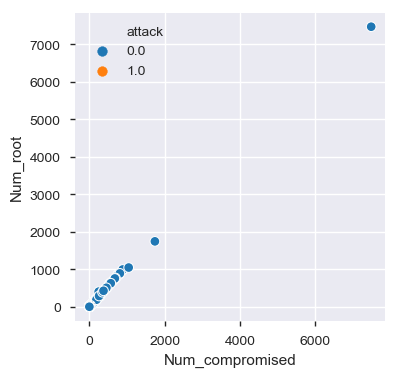

In [38]:
plt.figure(figsize=(4,4))
sns.scatterplot('Num_compromised','Num_root', data=train, hue=y)

**Observation** : Most of the **root access operations** are in **compromised conditions**.

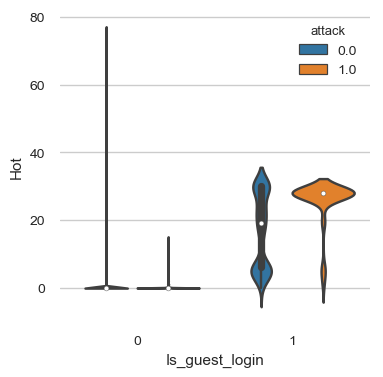

In [46]:
plt.figure(figsize=(4,4))
sns.violinplot('Is_guest_login', 'Hot', data=train, hue=y)

**Observation**: There are very few logins which are not guest.<br>
There are **guest logins** where **hot operations** are between 25-35 **are actually attack connections**.

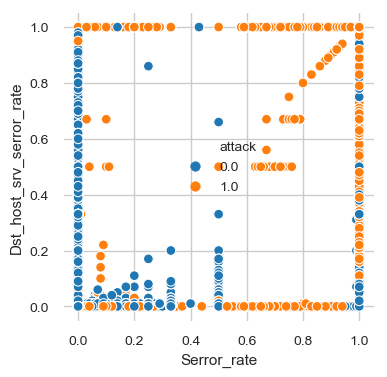

In [47]:
plt.figure(figsize=(4,4))
sns.scatterplot('Serror_rate', 'Dst_host_srv_serror_rate', data=train, hue=y)    

**Observation**: Serror_rate is a clear indicator of whether an attack is hapenning or not.
Serror_rate greater than 0.5 has a lot of attacks.

In [56]:
np.unique(y[train['Serror_rate'] > 0.5], return_counts=True)

(array([0., 1.]), array([  437, 34830], dtype=int64))

**Observation** : There are 34830 attacks when Serror_rate is greater than 0.5

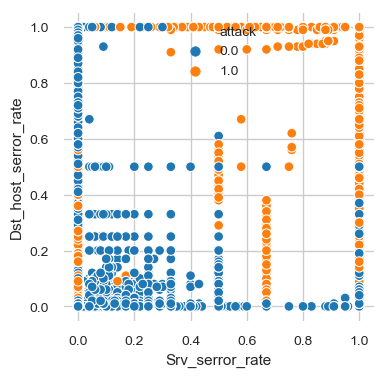

In [57]:
plt.figure(figsize=(4,4))
sns.scatterplot('Srv_serror_rate', 'Dst_host_serror_rate', data=train, hue=y)    

**Observation**: **Srv_serror_rate** and **Dst_host_serror_rate** are clear indicators of attacks happening or not.  <br>
Basically if I draw a diagonal line, it will separate most of the attacks. <br>
Equation of the classification line will be **Srv_serror_rate** + **Dst_host_serror_rate** = 1

In [66]:
np.unique(y[(train['Srv_serror_rate'] + train['Dst_host_serror_rate']) > 1], return_counts=True)

(array([0., 1.]), array([  311, 34795], dtype=int64))

**Observation** : 34795 attacks and 311 normal conditions when Srv_serror_rate + Dst_host_serror_rate greater than 1.

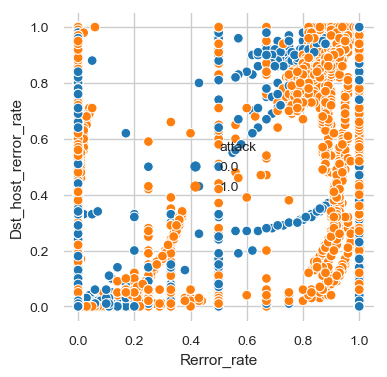

In [58]:
plt.figure(figsize=(4,4))
sns.scatterplot('Rerror_rate', 'Dst_host_rerror_rate', data=train, hue=y)    

**Observation**: Lots of attacks when **rerror_rate** greater than 0.5

In [59]:
np.unique(y[train['Rerror_rate'] > 0.5], return_counts=True)

(array([0., 1.]), array([ 2948, 12226], dtype=int64))

**Observation** : 12226 attacks and 2948 non attacks when rerror_rate greater than 0.5

Now we have done correlation plots and simple multivariate analysis to classify connections which are attack or normal.
Lets try to do this with machine learning algorithms.

# Handling Categorical Variables

In [68]:
encoded_cols = pd.get_dummies(train[cat_cols], drop_first=True)
encoded_cols.shape

(125972, 81)

**Observation**:  <br>
81 columns after one hot encoding. <br>
The dataset is highly cardinal. <br>
We will have to drop them.

# Creating Features and Labels

In [12]:
train.shape

(125972, 43)

In [15]:
X = train.drop(cat_cols, axis = 1)
X = X.drop(['attack', 'Num_outbound_cmds'], axis = 1)

In [16]:
X.shape

(125972, 38)

In [17]:
y = train['attack']
y.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [18]:
# We will create a label target as attack or normal
# attack = 1
# normal = 0

y = (y != 'normal').astype(float)
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: attack, dtype: float64

In [19]:
# Lets create our train and validation split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [20]:
# metrics

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score

In [21]:
def model_train(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name + " Validation Data")
    cm = confusion_matrix(y_test, y_pred)
    print(name +" Confusion Matrix " +" Validation Data")
    print(cm)
    print('-----------------------')
    cr = classification_report(y_test, y_pred)
    print(name +" Classification Report " +" Validation Data")
    print(cr)
    print('------------------------')
    print(name +" AUC Score " +" Validation Data")
    auc = roc_auc_score(y_test, y_pred)
    print("AUC Score " + str(auc))
    print(name +" Accuracy " +" Validation Data")
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy "+ str(acc))
    return auc, acc



**Cleaning Test Data before predictions.**

In [22]:
# Creating features and labels

test_X = test.drop(cat_cols, axis = 1)
test_X = test_X.drop(['attack', 'Num_outbound_cmds'], axis = 1)

test_y = test['attack']
test_y = (test_y != 'normal').astype(float)

In [23]:
def model_test(model, name):
    model.fit(X,y)
    y_pred = model.predict(test_X)
    print(name + " Test Data")
    cm = confusion_matrix(test_y, y_pred)
    print(name +" Confusion Matrix " +" Test Data")
    print(cm)
    print('-----------------------')
    cr = classification_report(test_y, y_pred)
    print(name +" Classification Report " +" Test Data")
    print(cr)
    print('------------------------')
    print(name +" AUC Score " +" Test Data")
    auc = roc_auc_score(test_y, y_pred)
    print("AUC Score ", str(auc))
    print(name +" Accuracy " +" Test Data")
    acc = accuracy_score(test_y, y_pred)
    print("Accuracy ", str(acc))
    return auc, acc
    
    

# Model Building

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10, min_samples_leaf =3, random_state=101)

In [25]:
dt_auc, dt_acc = model_train(dt, "Decision Tree")

Decision Tree Validation Data
Decision Tree Confusion Matrix  Validation Data
[[13295    50]
 [   16 11834]]
-----------------------
Decision Tree Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13345
         1.0       1.00      1.00      1.00     11850

   micro avg       1.00      1.00      1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

------------------------
Decision Tree AUC Score  Validation Data
AUC Score 0.9974515337054761
Decision Tree Accuracy  Validation Data
Accuracy 0.9973804326255209


**Observation**: There are 16 cases where attacks are happening in the **Train data** but the model is unable to predict it. Our precision is really close to 1.

In [26]:
dt_test_auc, dt_test_acc = model_test(dt, "Decision Tree")

Decision Tree Test Data
Decision Tree Confusion Matrix  Test Data
[[9505  206]
 [3178 9654]]
-----------------------
Decision Tree Classification Report  Test Data
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85      9711
         1.0       0.98      0.75      0.85     12832

   micro avg       0.85      0.85      0.85     22543
   macro avg       0.86      0.87      0.85     22543
weighted avg       0.88      0.85      0.85     22543

------------------------
Decision Tree AUC Score  Test Data
AUC Score  0.865562423939636
Decision Tree Accuracy  Test Data
Accuracy  0.8498868828461164


**Observation** : There are 3178 attacks which could not be predicted by the model in the **test data**.

## Naive Bayes Algorithm

In [27]:
# Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()

In [28]:
nb_auc, nb_acc = model_train(nb_clf, "Naive Bayes Classifier")

Naive Bayes Classifier Validation Data
Naive Bayes Classifier Confusion Matrix  Validation Data
[[13124   221]
 [11648   202]]
-----------------------
Naive Bayes Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       0.53      0.98      0.69     13345
         1.0       0.48      0.02      0.03     11850

   micro avg       0.53      0.53      0.53     25195
   macro avg       0.50      0.50      0.36     25195
weighted avg       0.51      0.53      0.38     25195

------------------------
Naive Bayes Classifier AUC Score  Validation Data
AUC Score 0.5002429519739848
Naive Bayes Classifier Accuracy  Validation Data
Accuracy 0.5289144671561817


In [29]:
nb_test_auc, nb_test_acc = model_test(nb_clf, "Naive Bayes Classifier")

Naive Bayes Classifier Test Data
Naive Bayes Classifier Confusion Matrix  Test Data
[[ 9679    32]
 [12359   473]]
-----------------------
Naive Bayes Classifier Classification Report  Test Data
              precision    recall  f1-score   support

         0.0       0.44      1.00      0.61      9711
         1.0       0.94      0.04      0.07     12832

   micro avg       0.45      0.45      0.45     22543
   macro avg       0.69      0.52      0.34     22543
weighted avg       0.72      0.45      0.30     22543

------------------------
Naive Bayes Classifier AUC Score  Test Data
AUC Score  0.5167828701788417
Naive Bayes Classifier Accuracy  Test Data
Accuracy  0.45033935146165105


Naive Bayes Algorithm performed poorly on the Test data with auc roc score of 0.51`

## Random Forest Algorithm

In [32]:
# Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 20, criterion='gini', max_depth = 10, min_samples_split=3, random_state=101)

In [33]:
rf_auc, rf_acc = model_train(rf_clf, "Random Forest Classifier")

Random Forest Classifier Validation Data
Random Forest Classifier Confusion Matrix  Validation Data
[[13312    33]
 [    9 11841]]
-----------------------
Random Forest Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13345
         1.0       1.00      1.00      1.00     11850

   micro avg       1.00      1.00      1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

------------------------
Random Forest Classifier AUC Score  Validation Data
AUC Score 0.9983838350304244
Random Forest Classifier Accuracy  Validation Data
Accuracy 0.998333002579877


**Observation** : There are 9 attacks which we werent able to identify. Its precision is better than Decision Tree. <br>


In [34]:
rf_test_auc, rf_test_acc = model_test(rf_clf, "Random Forest Classifier")

Random Forest Classifier Test Data
Random Forest Classifier Confusion Matrix  Test Data
[[9443  268]
 [3213 9619]]
-----------------------
Random Forest Classifier Classification Report  Test Data
              precision    recall  f1-score   support

         0.0       0.75      0.97      0.84      9711
         1.0       0.97      0.75      0.85     12832

   micro avg       0.85      0.85      0.85     22543
   macro avg       0.86      0.86      0.85     22543
weighted avg       0.88      0.85      0.85     22543

------------------------
Random Forest Classifier AUC Score  Test Data
AUC Score  0.8610063896804687
Random Forest Classifier Accuracy  Test Data
Accuracy  0.8455839950317172


**Observation** : auc roc score is 0.86 which is nearly same as Decision Tree 0.86.  <br>
The model has misclassified 3213 attacks in test **Test data**, which is slightly more than Decision Tree.

## XGBoost Classification

In [37]:
from xgboost.sklearn import XGBClassifier
xgb_clf = XGBClassifier(random_state=101)

In [38]:
xgb_auc, xgb_acc = model_train(xgb_clf, "XGBoost Classifier")

XGBoost Classifier Validation Data
XGBoost Classifier Confusion Matrix  Validation Data
[[13282    63]
 [    9 11841]]
-----------------------
XGBoost Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13345
         1.0       0.99      1.00      1.00     11850

   micro avg       1.00      1.00      1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

------------------------
XGBoost Classifier AUC Score  Validation Data
AUC Score 0.9972598185448492
XGBoost Classifier Accuracy  Validation Data
Accuracy 0.9971422901369319


**Observation** : There are only 9 attacks which were misclassified.

In [40]:
xgb_test_auc, xgb_test_acc = model_test(xgb_clf, "XGBoost Classifier")

XGBoost Classifier Test Data
XGBoost Classifier Confusion Matrix  Test Data
[[9422  289]
 [3071 9761]]
-----------------------
XGBoost Classifier Classification Report  Test Data
              precision    recall  f1-score   support

         0.0       0.75      0.97      0.85      9711
         1.0       0.97      0.76      0.85     12832

   micro avg       0.85      0.85      0.85     22543
   macro avg       0.86      0.87      0.85     22543
weighted avg       0.88      0.85      0.85     22543

------------------------
XGBoost Classifier AUC Score  Test Data
AUC Score  0.865458184005284
XGBoost Classifier Accuracy  Test Data
Accuracy  0.8509515148826686


**Observation**: Really good auc roc score of 0.86 which is nearly as same as Decision Tree. Best model so far.  <br>

Let try some hyper-parameter tuning to improve XGBoost

## GridSearch on XGBoost

In [67]:
from sklearn.model_selection import GridSearchCV

xgb_gs_clf = XGBClassifier()                         
                        
param_grid = {"max_depth": [7,10],
              "n_estimators": [50,70,100] , 
              "gamma": [0.03], 
              "learning_rate": [0.08],
              "min_child_weight": [5], 
              "colsample_bytree": [0.8], 
              "subsample": [0.85]} 

grid_search = GridSearchCV(xgb_gs_clf, 
                           param_grid=param_grid,
                           cv = 2,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)

grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   33.5s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.1min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [7, 10], 'n_estimators': [50, 70, 100], 'gamma': [0.03], 'learning_rate': [0.08], 'min_child_weight': [5], 'colsample_bytree': [0.8], 'subsample': [0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=2)

In [68]:
gs_y_pred = grid_search.predict(X_test)

In [69]:
# metrics

cm = confusion_matrix(y_test, xgb_y_pred)            
print(cm)
print('-----------------------')
cr = classification_report(y_test, xgb_y_pred)
print(cr)
print('------------------------')
print(roc_auc_score(y_test, xgb_y_pred))

[[13273    72]
 [   19 11831]]
-----------------------
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     13345
         1.0       0.99      1.00      1.00     11850

   micro avg       1.00      1.00      1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

------------------------
0.9965006726709066


**Observation** : Only 19 attacks misclassified. Lets see the best parameters.

In [70]:
print(grid_search.best_params_)

{'colsample_bytree': 0.8, 'gamma': 0.03, 'learning_rate': 0.08, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.85}


In [71]:
grid_search.fit(X,y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   31.5s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.2min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [7, 10], 'n_estimators': [50, 70, 100], 'gamma': [0.03], 'learning_rate': [0.08], 'min_child_weight': [5], 'colsample_bytree': [0.8], 'subsample': [0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=2)

In [72]:
gs_test_pred = grid_search.predict(test_X)

In [73]:
# metrics

cm = confusion_matrix(test_y, gs_test_pred)            
print(cm)
print('-----------------------')
cr = classification_report(test_y, gs_test_pred)
print(cr)
print('------------------------')
print(roc_auc_score(test_y, gs_test_pred))


[[9454  257]
 [4011 8821]]
-----------------------
              precision    recall  f1-score   support

         0.0       0.70      0.97      0.82      9711
         1.0       0.97      0.69      0.81     12832

   micro avg       0.81      0.81      0.81     22543
   macro avg       0.84      0.83      0.81     22543
weighted avg       0.86      0.81      0.81     22543

------------------------
0.8304786180658434


**Observation** : auc roc score of 0.83 which is really good, but not as good as XGBoost classifier. <br>
We will stick to the default hyperparameters which has provided the best model.

# Conclusion

In [74]:
dt_score = roc_auc_score(test_y, dt_test_pred)
nb_score = roc_auc_score(test_y, nb_test_pred)
rf_score = roc_auc_score(test_y, rf_test_pred)
xgb_score = roc_auc_score(test_y, xgb_test_pred)
gs_score = roc_auc_score(test_y, gs_test_pred)

In [75]:
scores = [dt_score, nb_score, rf_score, xgb_score, gs_score]
label = ['dt', 'nb', 'rf', 'xgb', 'gs']
index = np.arange(len(scores))
print(list(zip(label, scores)))

[('dt', 0.8617647022003223), ('nb', 0.5167828701788417), ('rf', 0.8120411942225068), ('xgb', 0.8500892276825184), ('gs', 0.8304786180658434)]


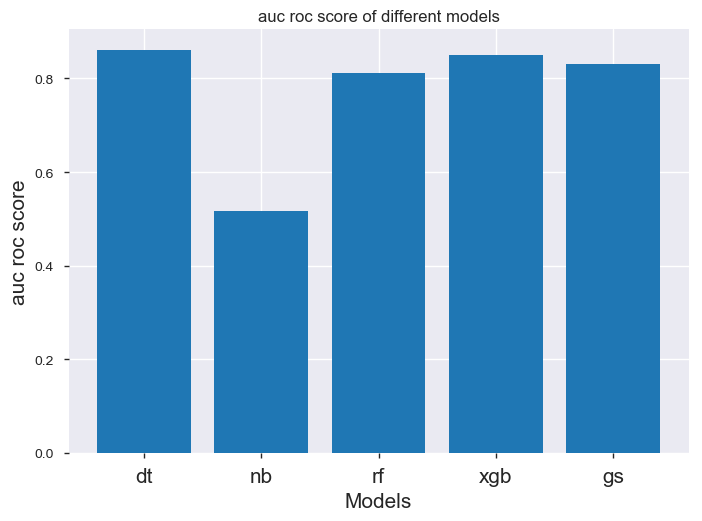

In [76]:
plt.bar(index, scores)
plt.xlabel('Models', fontsize=15)
plt.ylabel('auc roc score', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.title('auc roc score of different models')
plt.show()

Decision Tree has provided the best auc roc score followed by XG Boost Classifier.